In [6]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

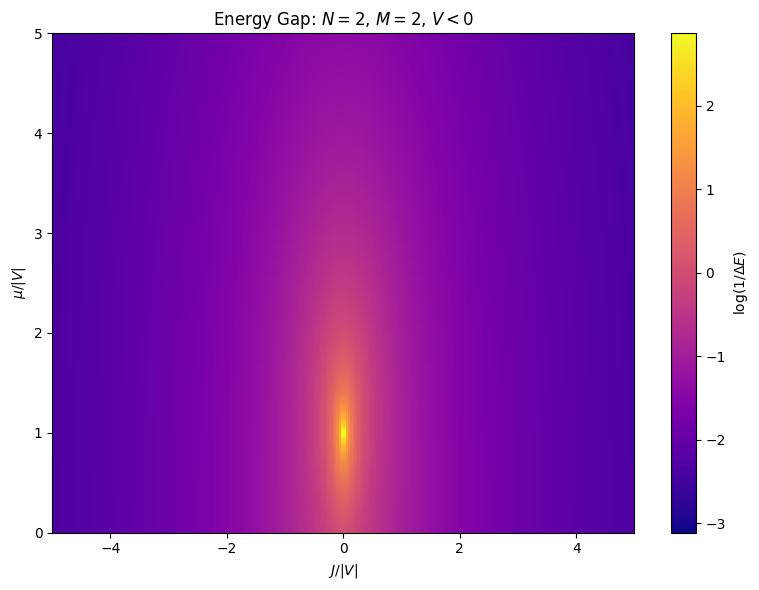

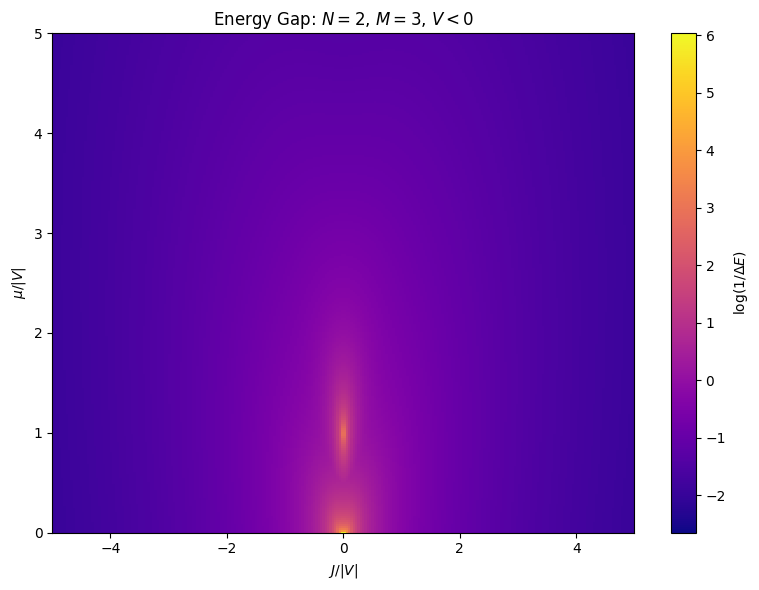

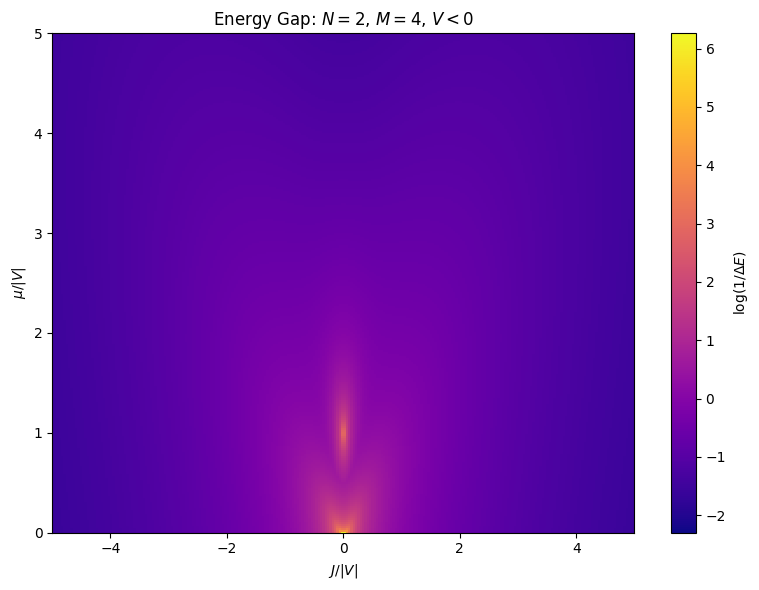

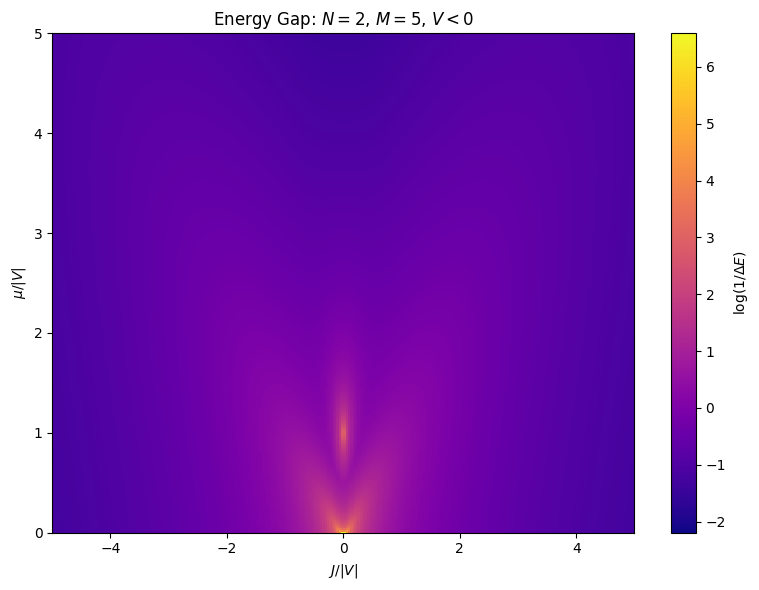

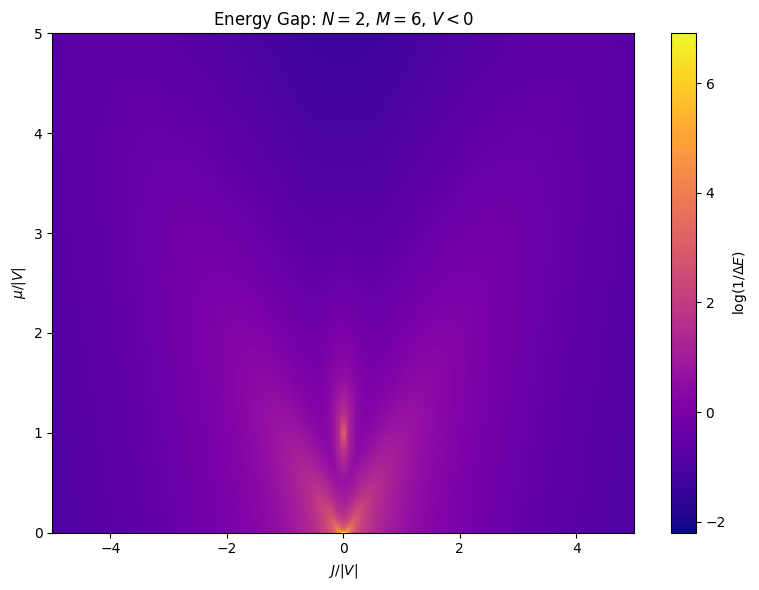

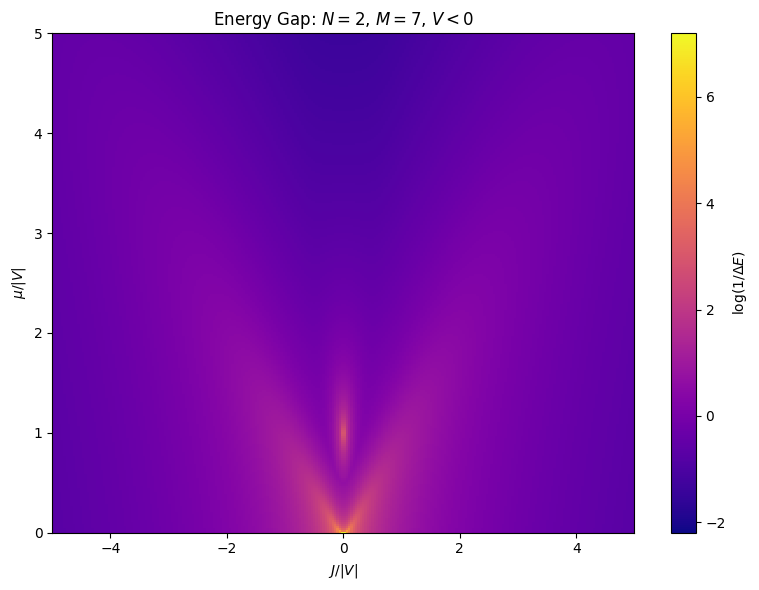

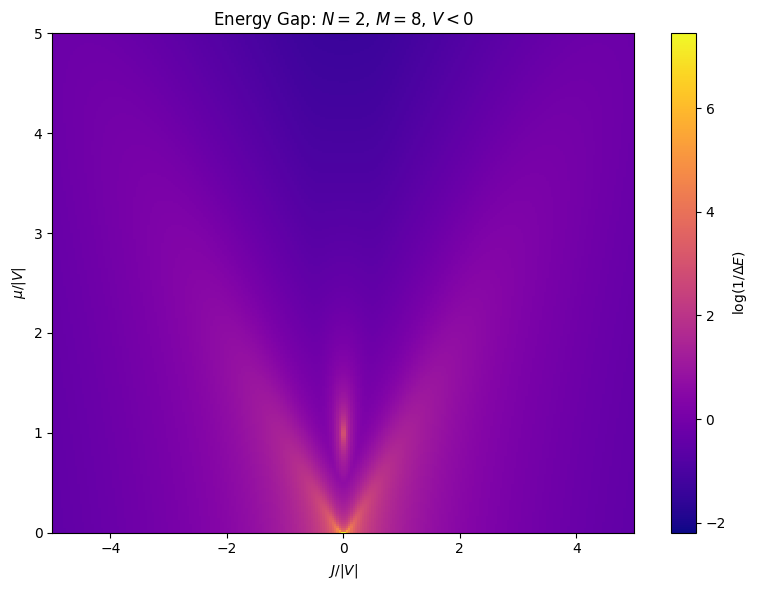

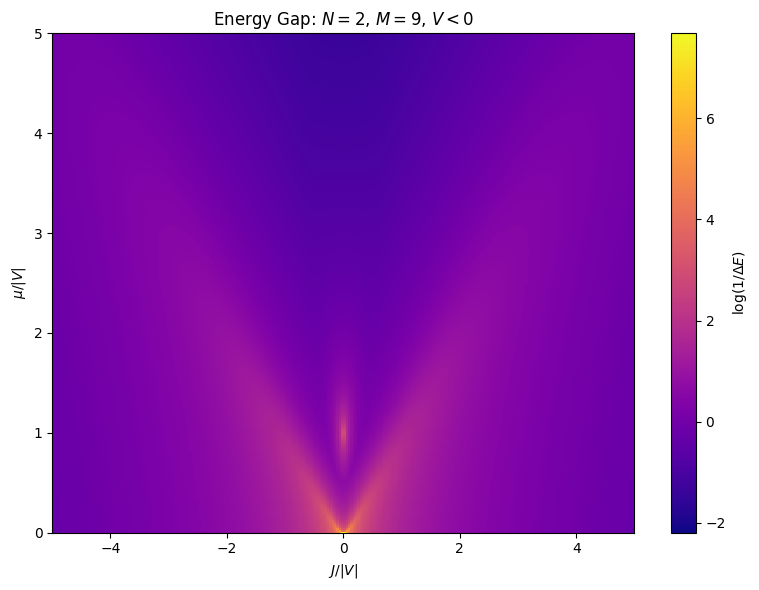

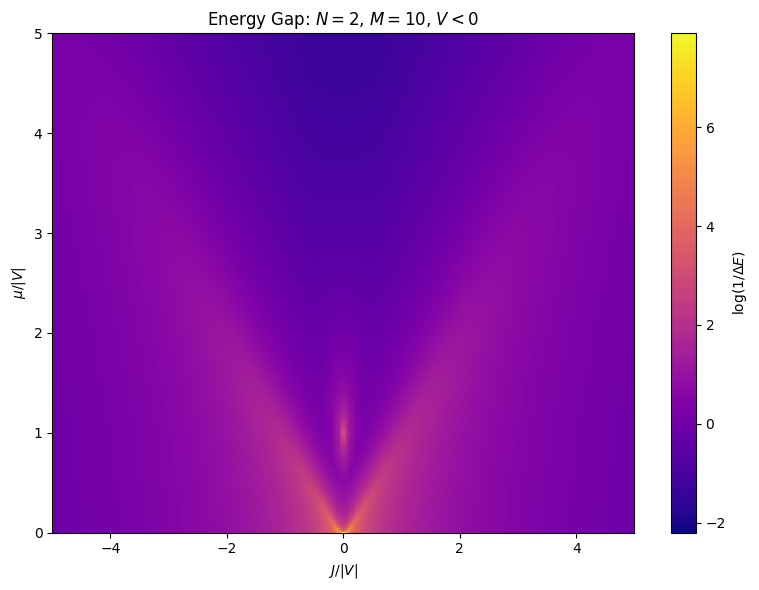

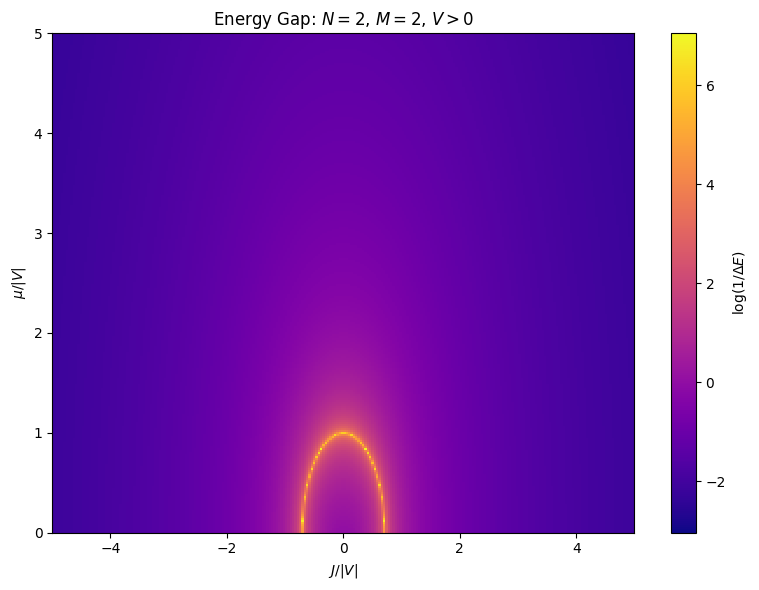

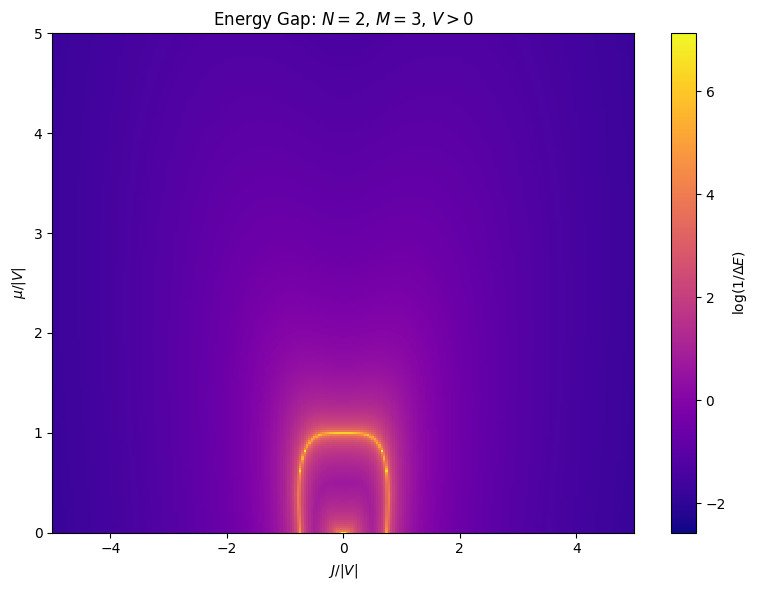

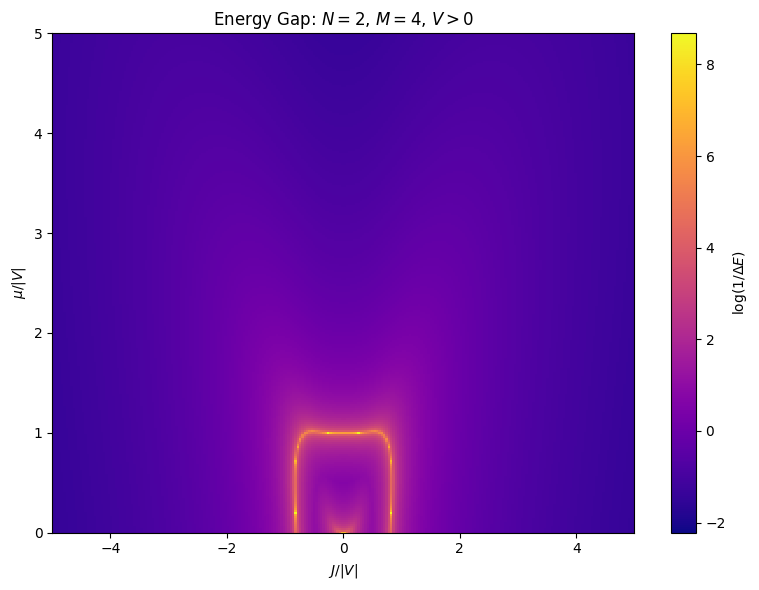

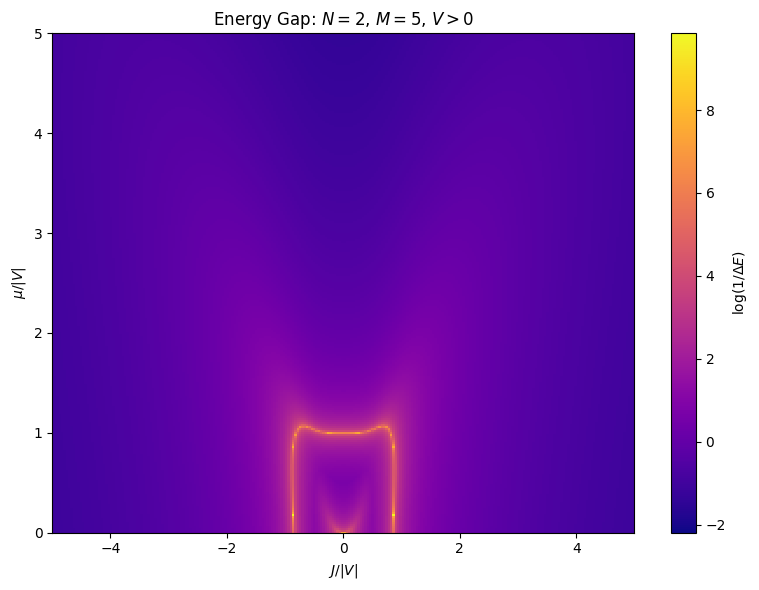

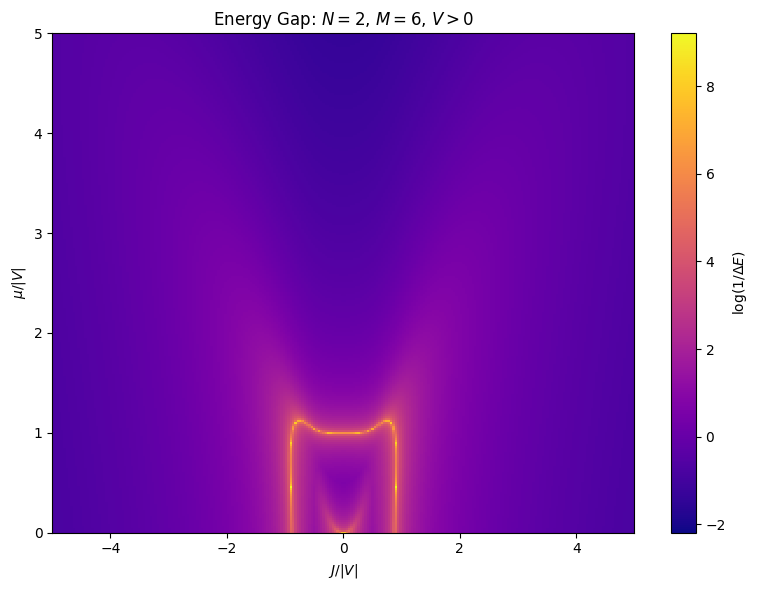

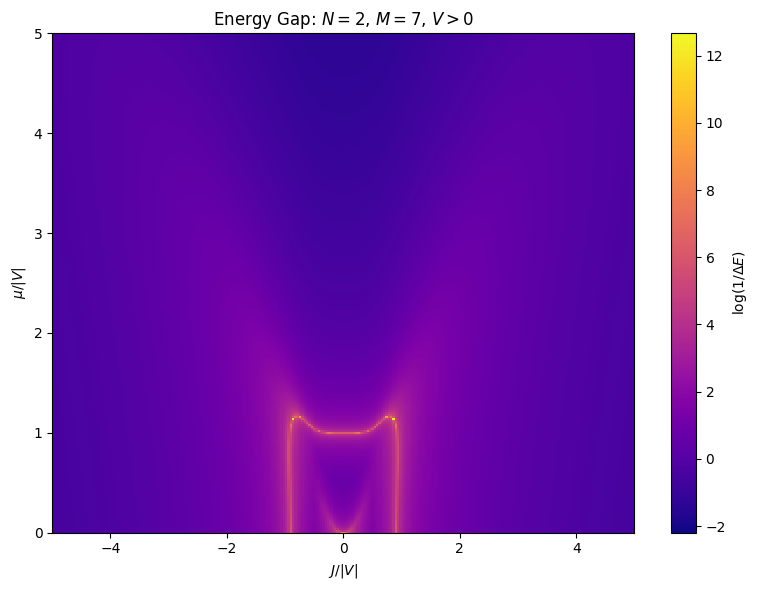

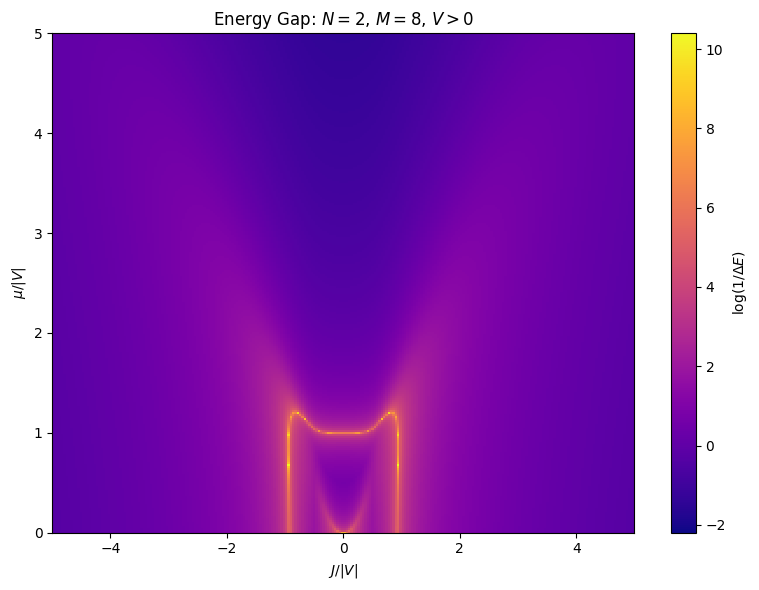

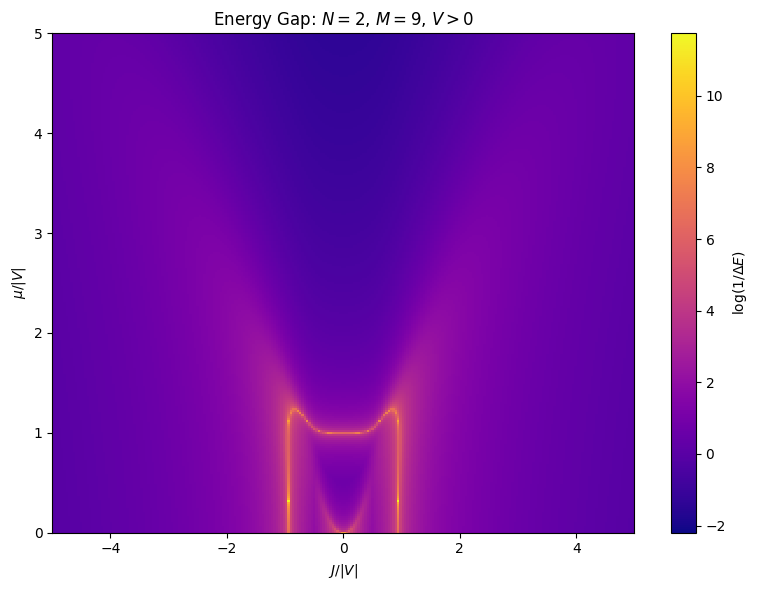

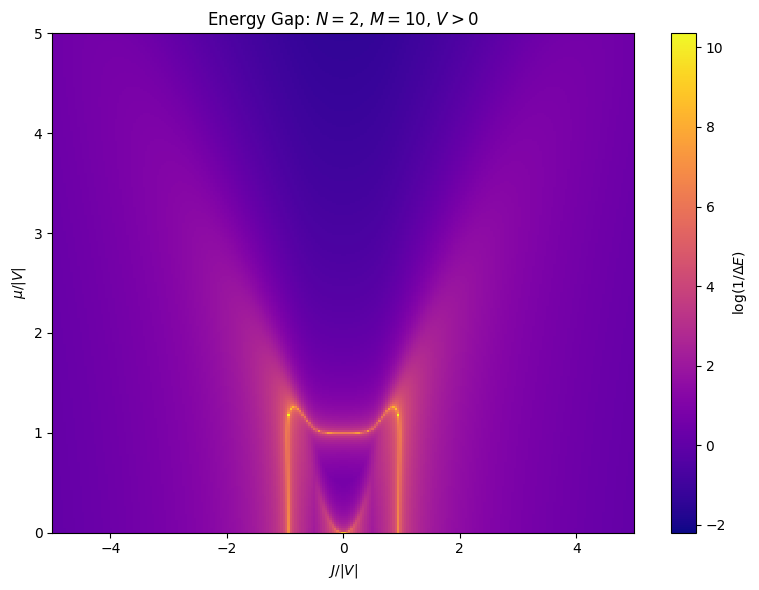

In [7]:
# N = 2, varying M
N = 2

for V in [-1,1]:
    for M in [2,3,4,5,6,7,8,9,10]:
        if np.sign(V) > 0:
            plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap")
        else:
            plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap")

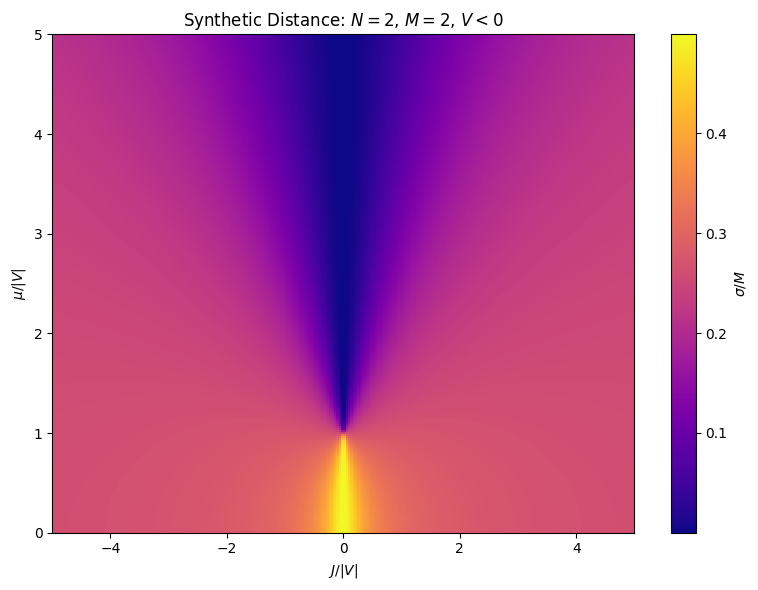

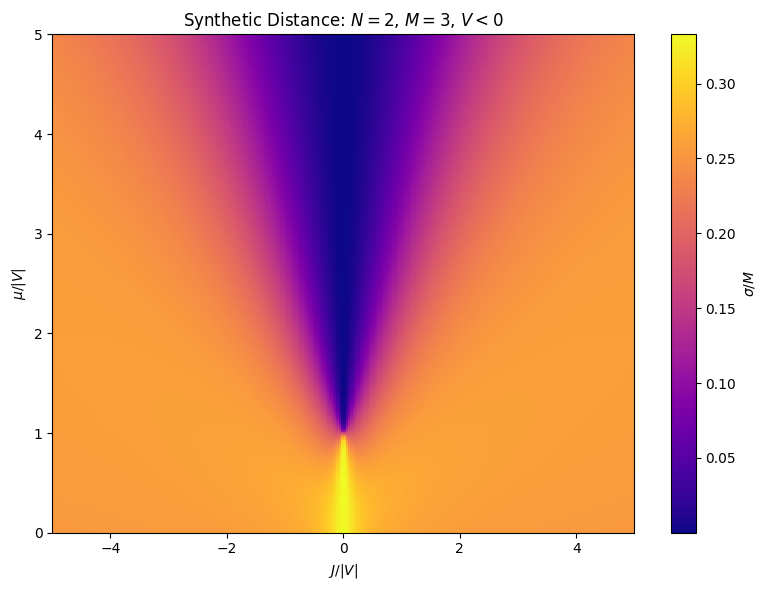

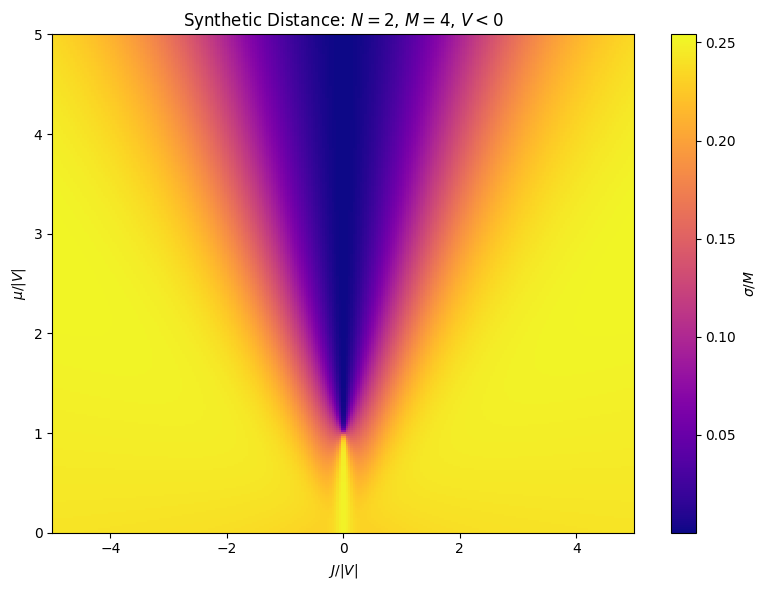

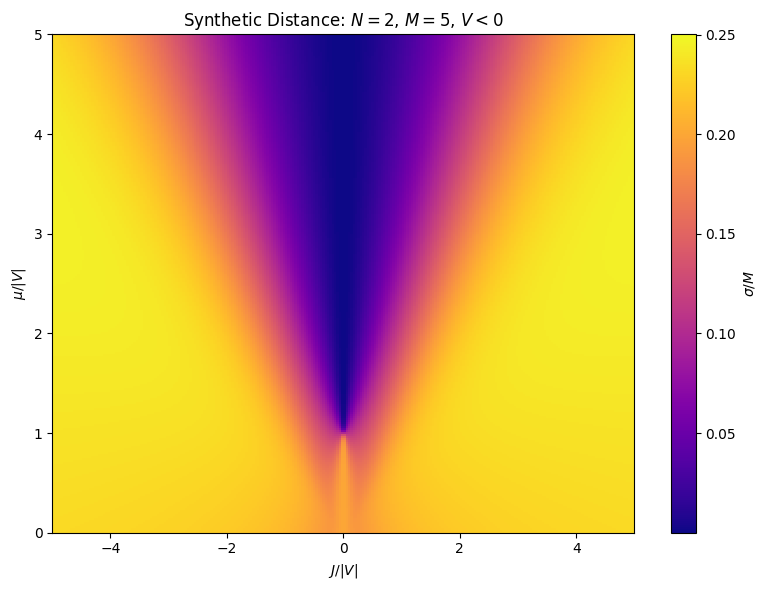

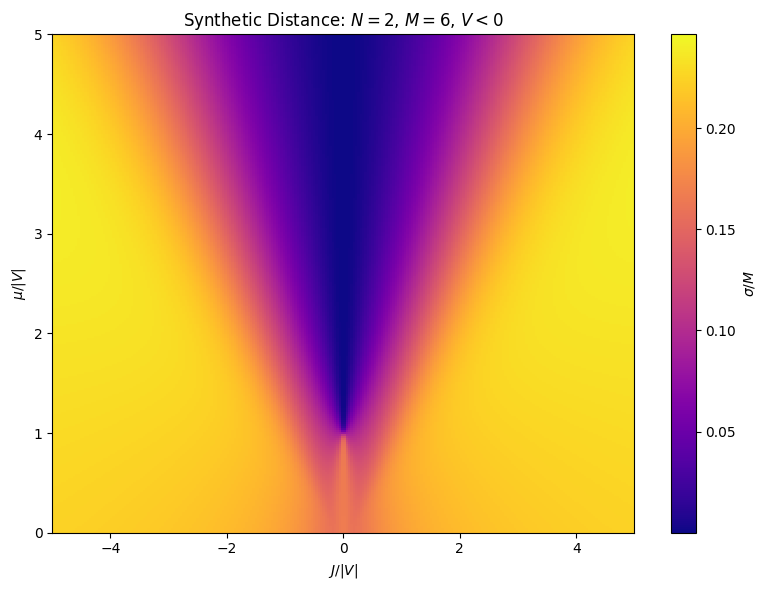

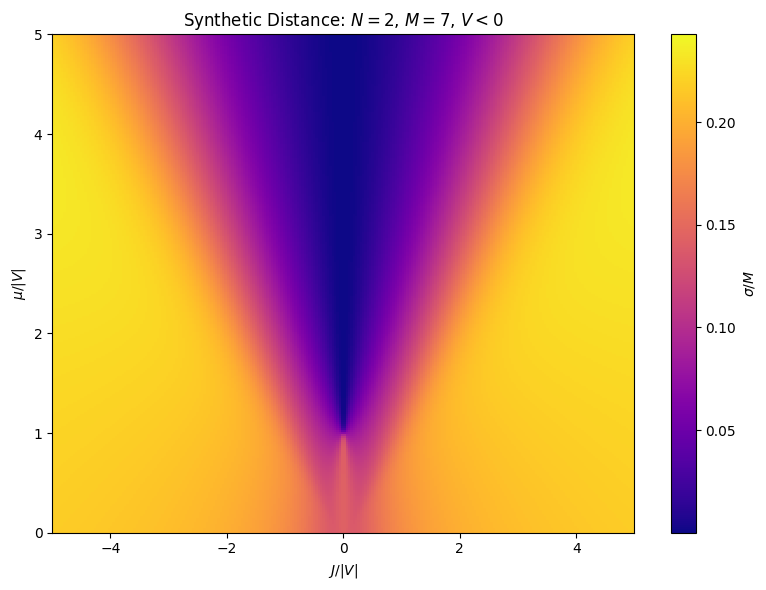

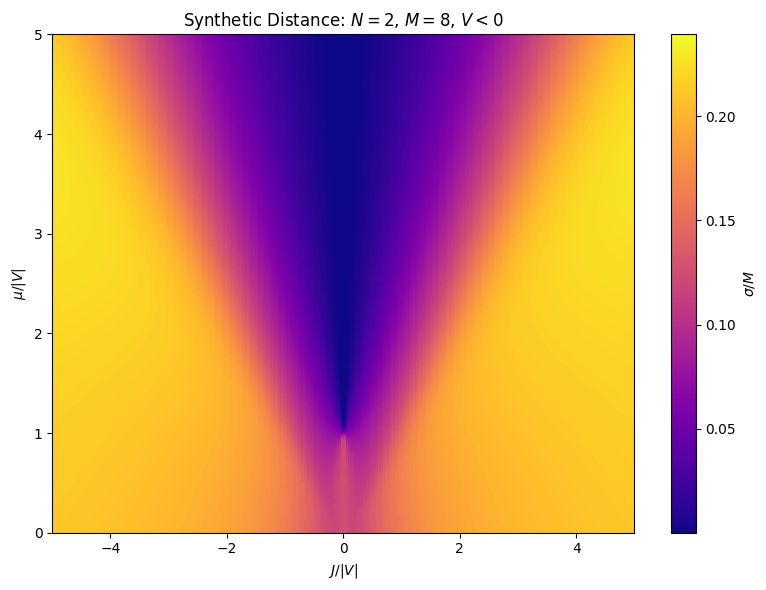

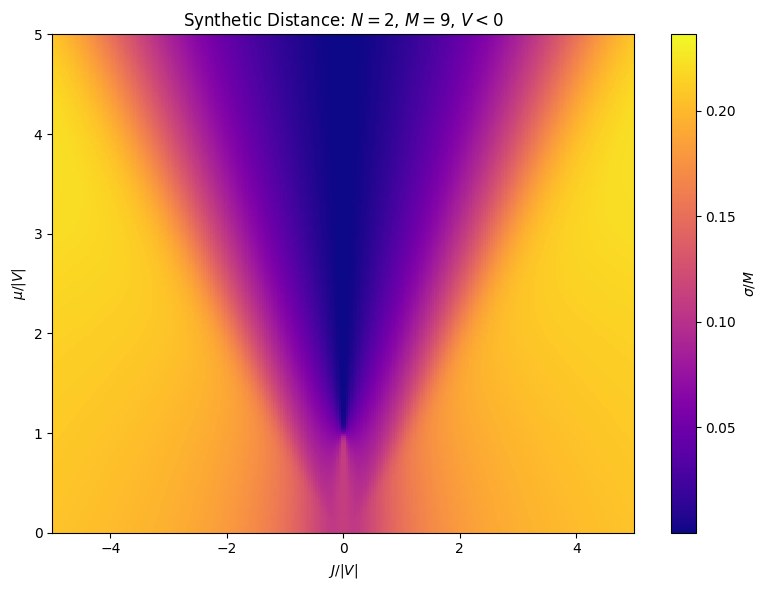

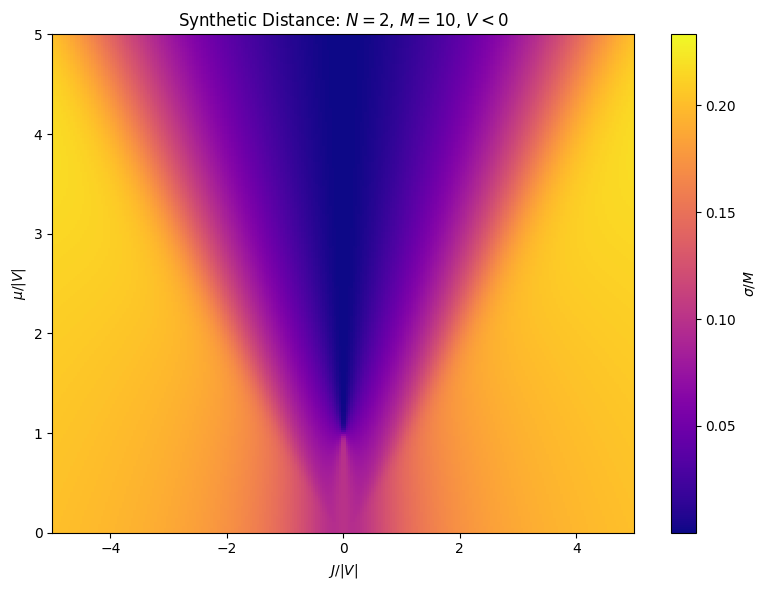

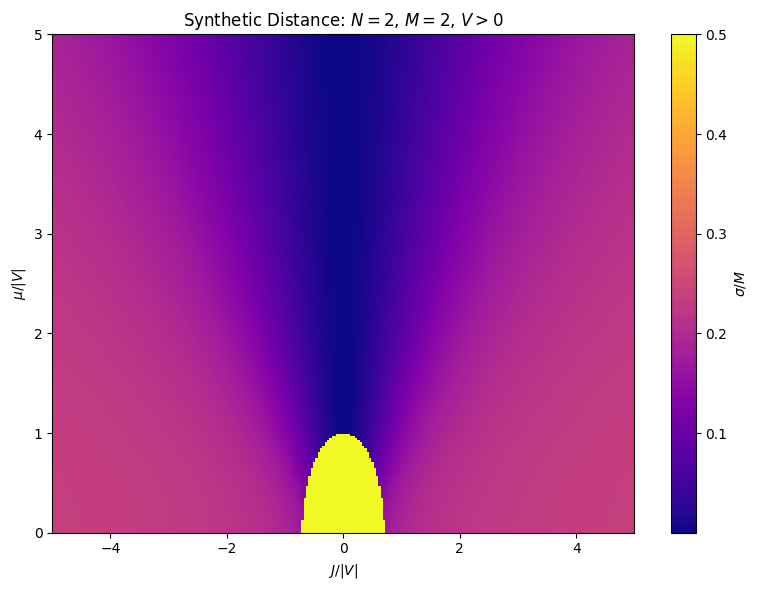

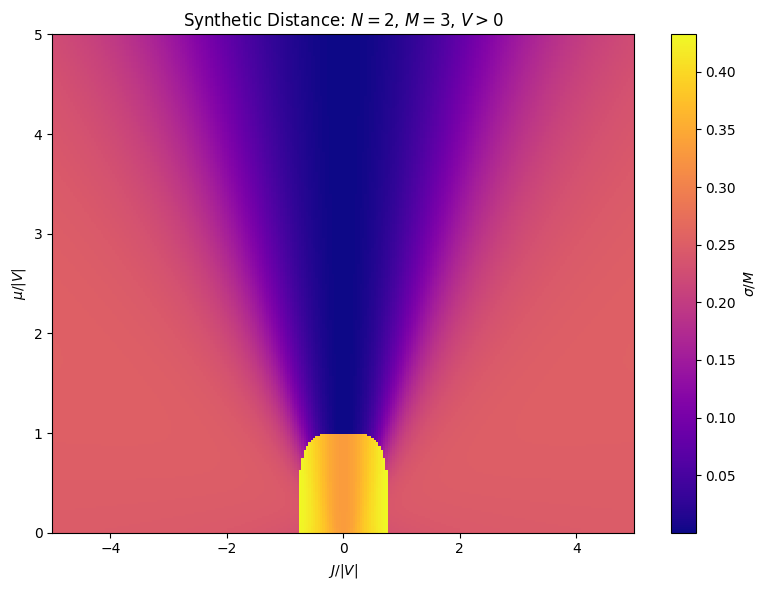

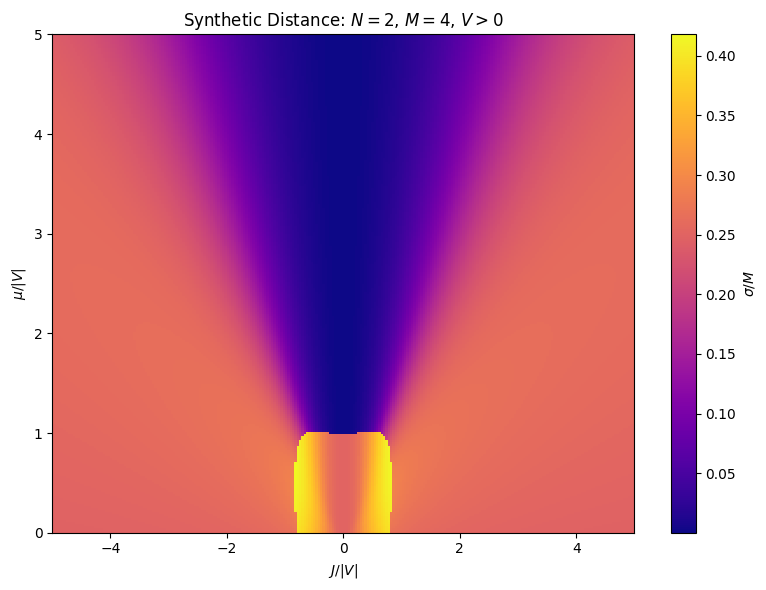

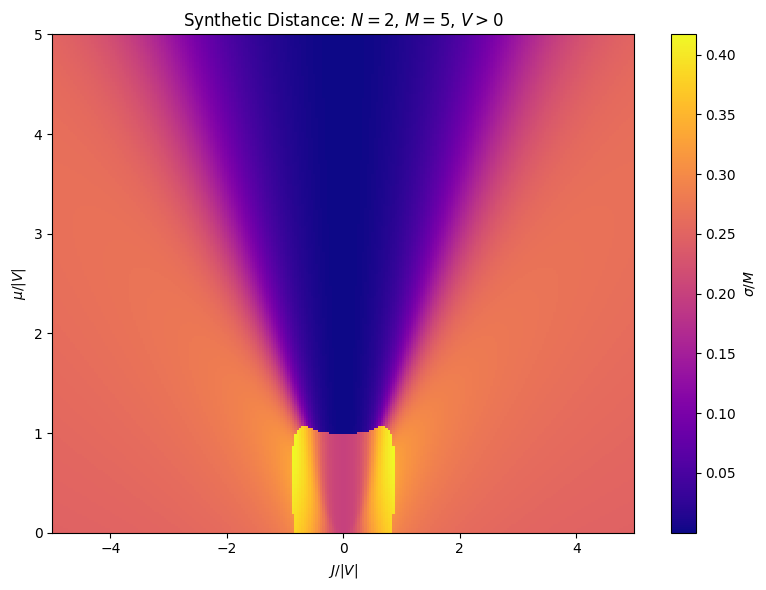

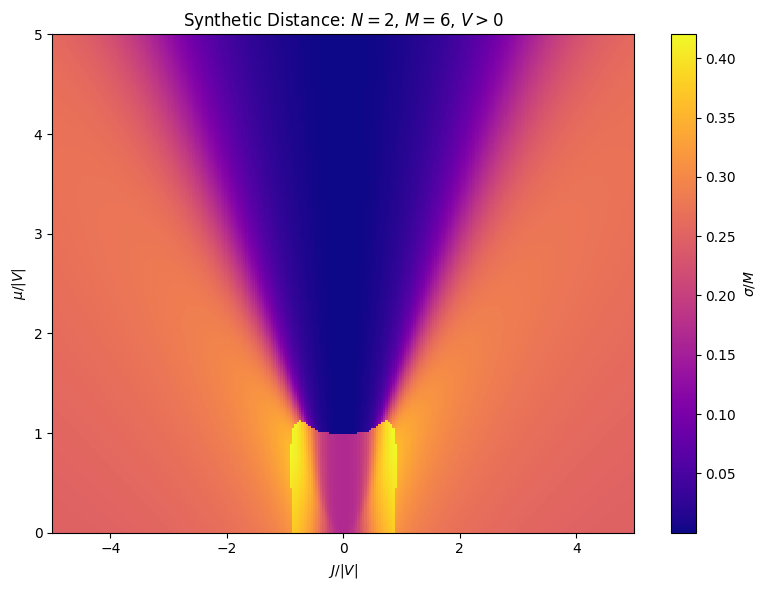

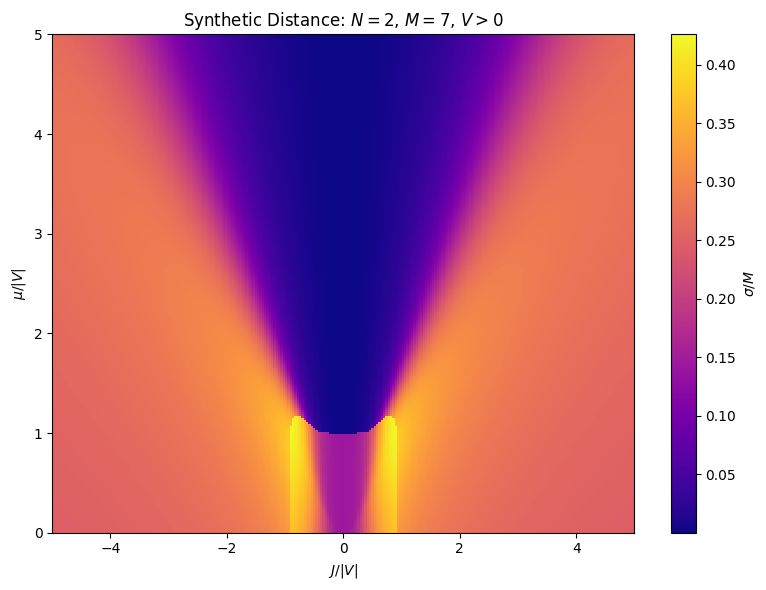

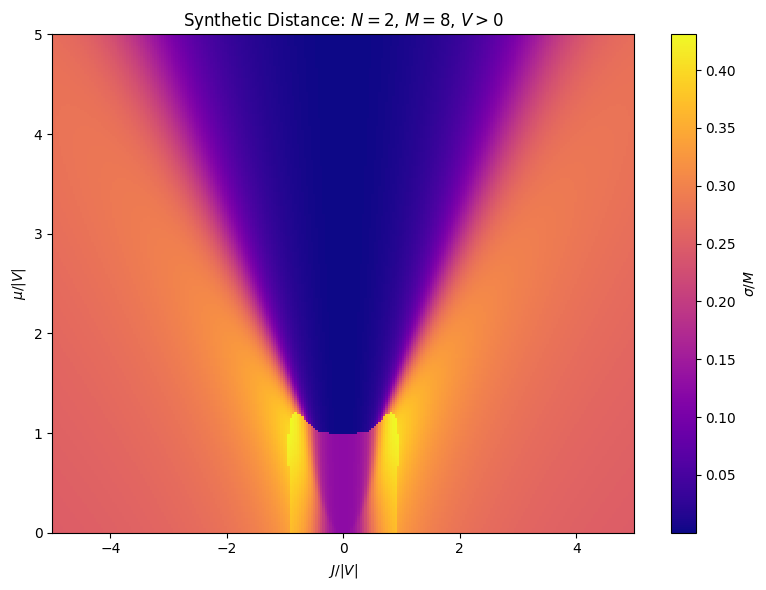

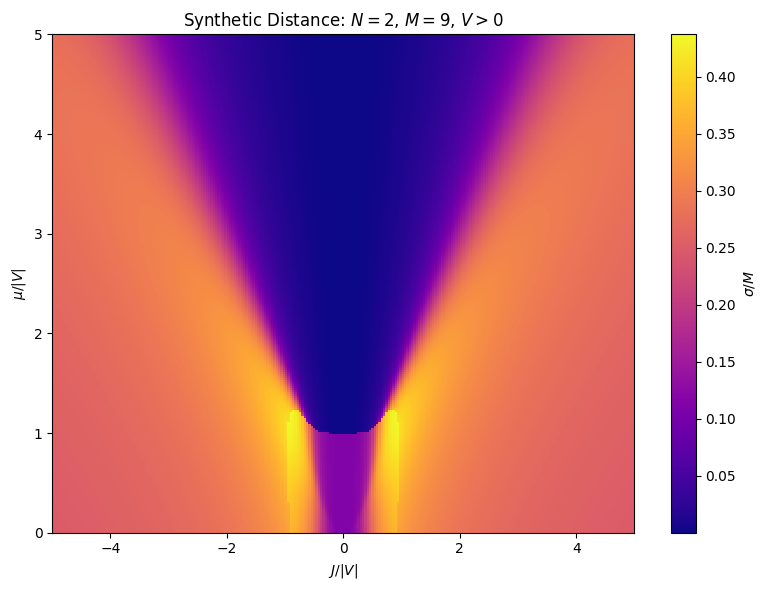

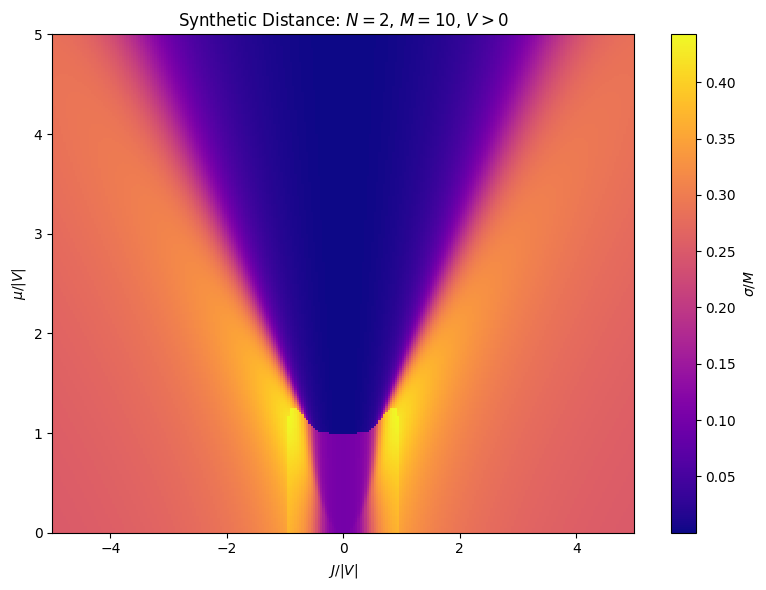

In [9]:
# N = 2, varying M
N = 2

for V in [-1,1]:
    for M in [2,3,4,5,6,7,8,9,10]:
        if np.sign(V) > 0:
            plot_data(N, M, sign_V="positive", gap_or_sigma="sigma")
        else:
            plot_data(N, M, sign_V="negative", gap_or_sigma="sigma")

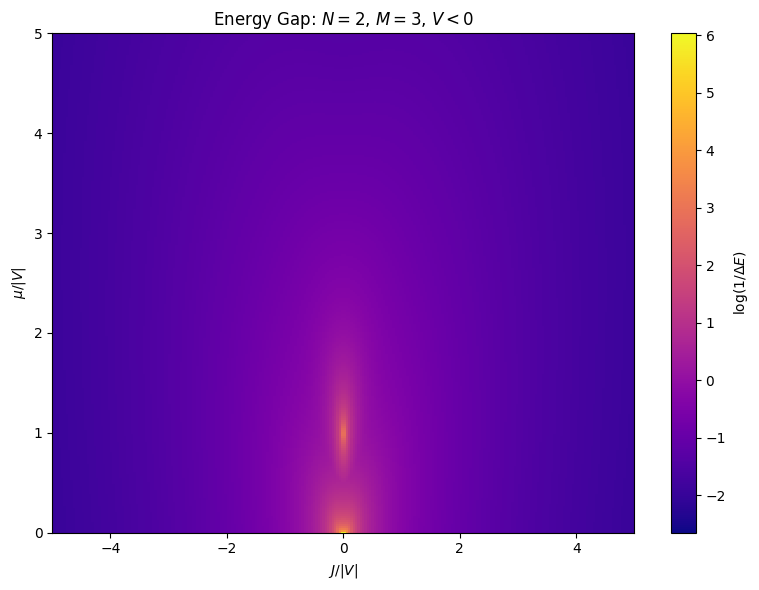

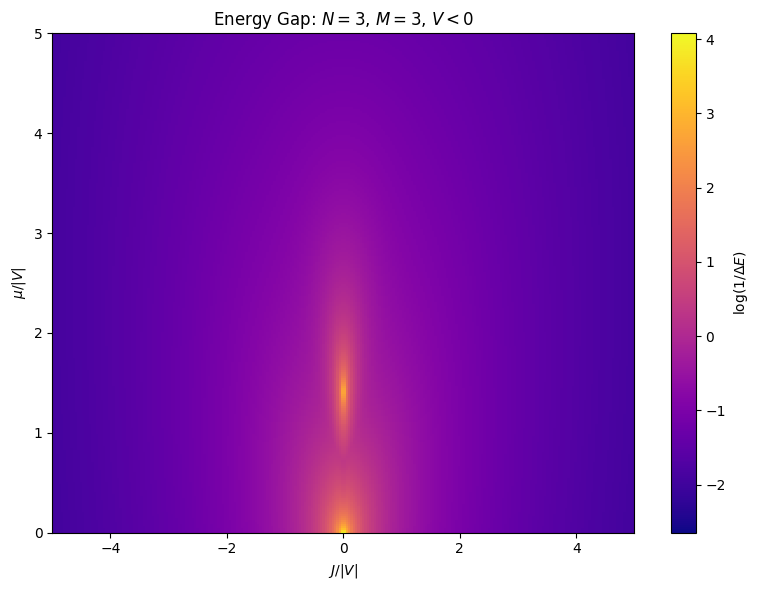

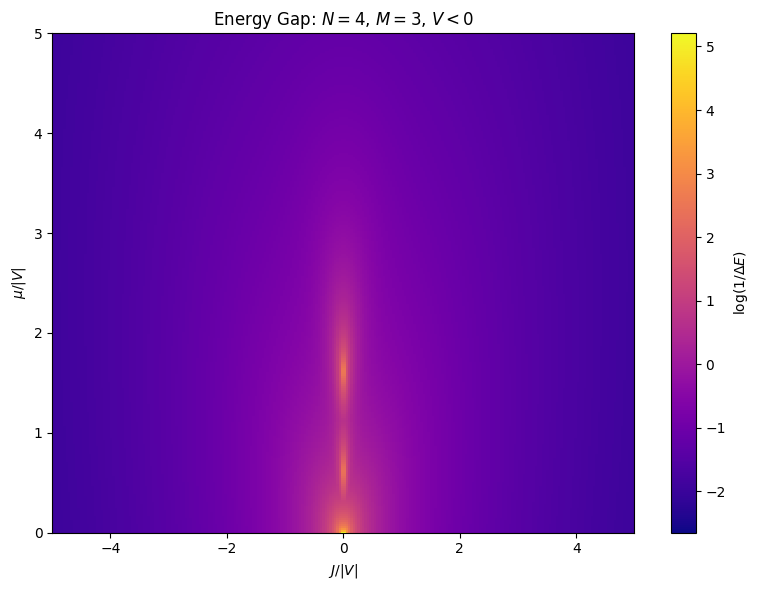

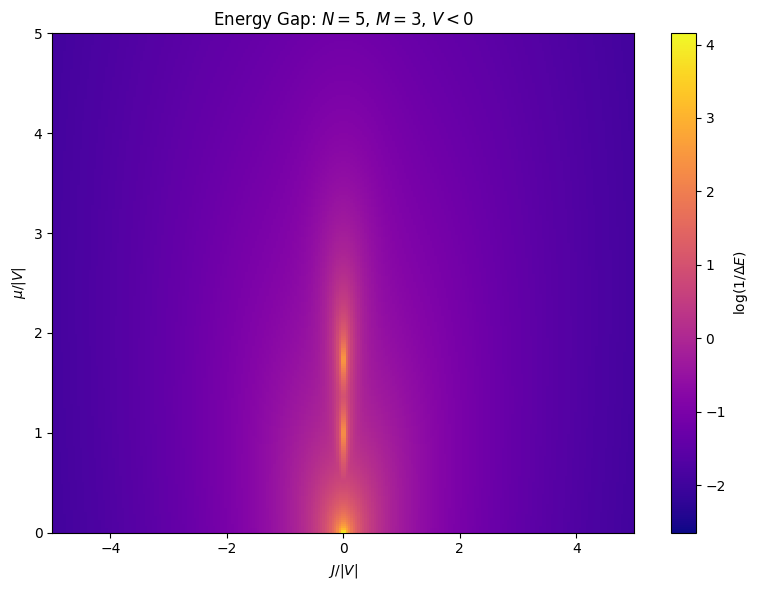

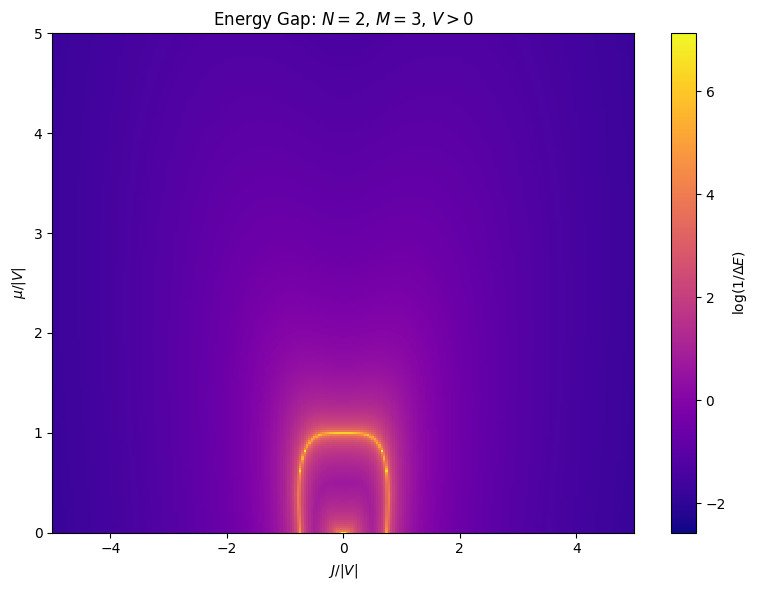

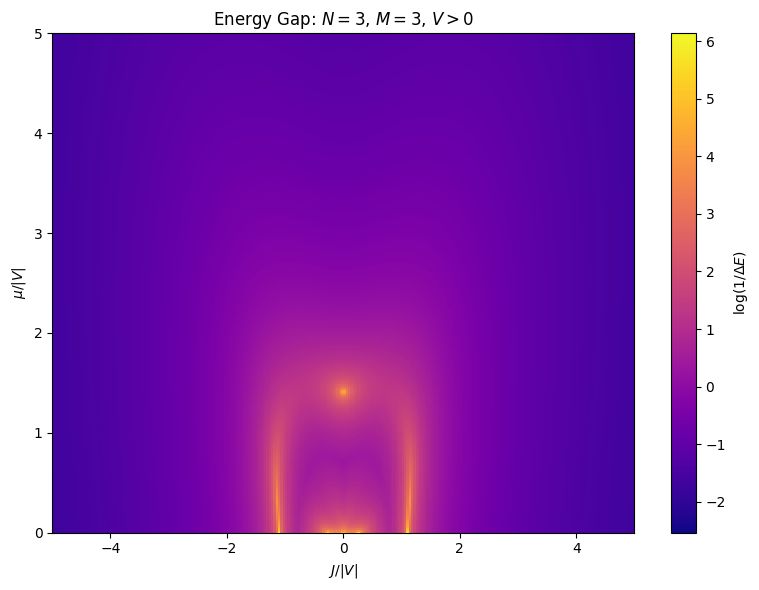

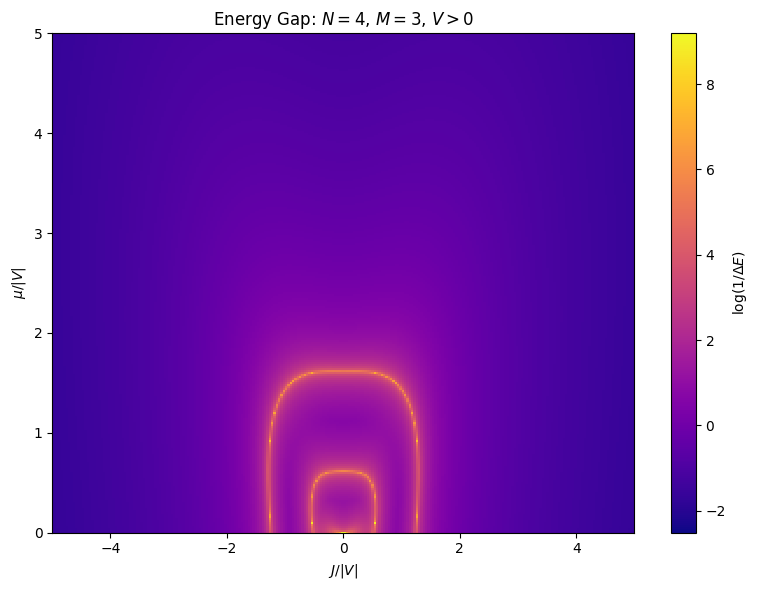

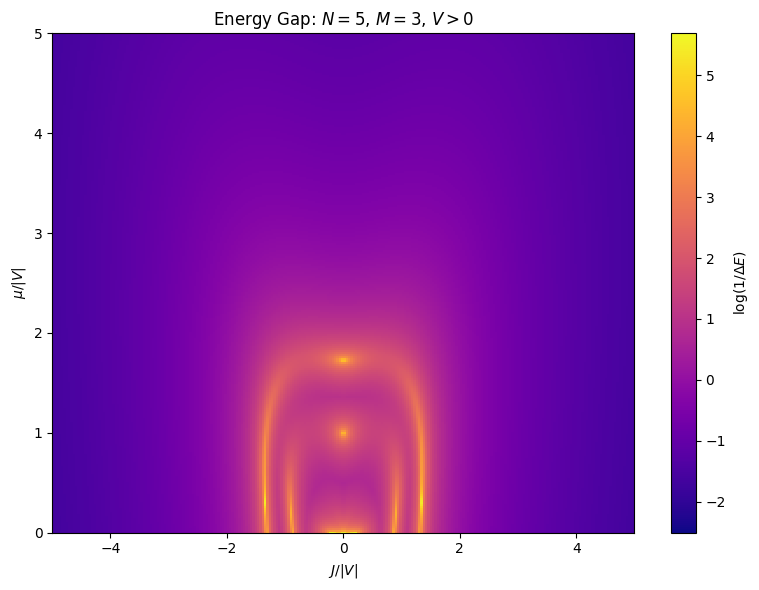

In [8]:
# M = 3, varying N
M = 3

for V in [-1,1]:
    for N in [2,3,4,5
            ]:
        if np.sign(V) > 0:
            plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap")
        else:
            plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap")

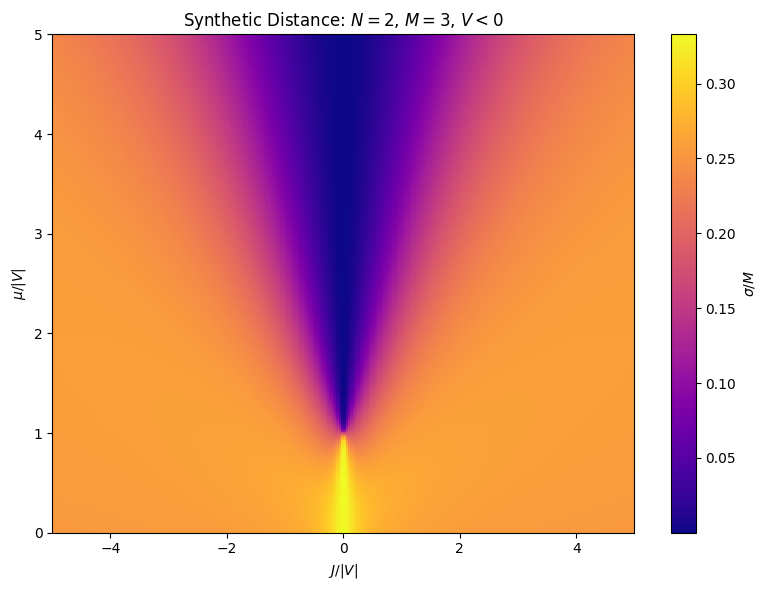

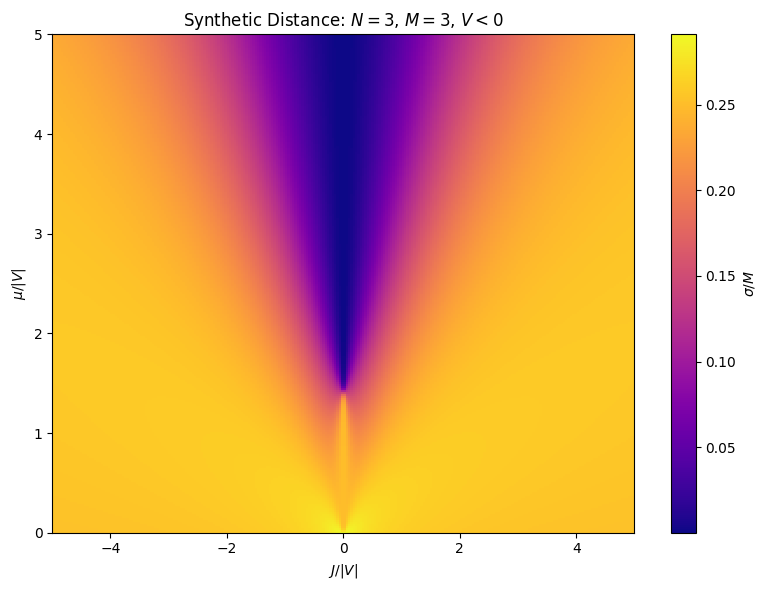

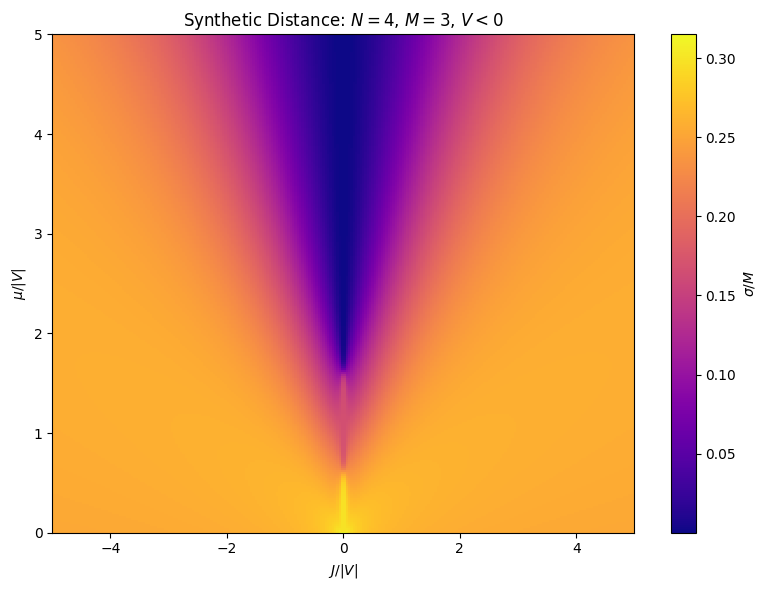

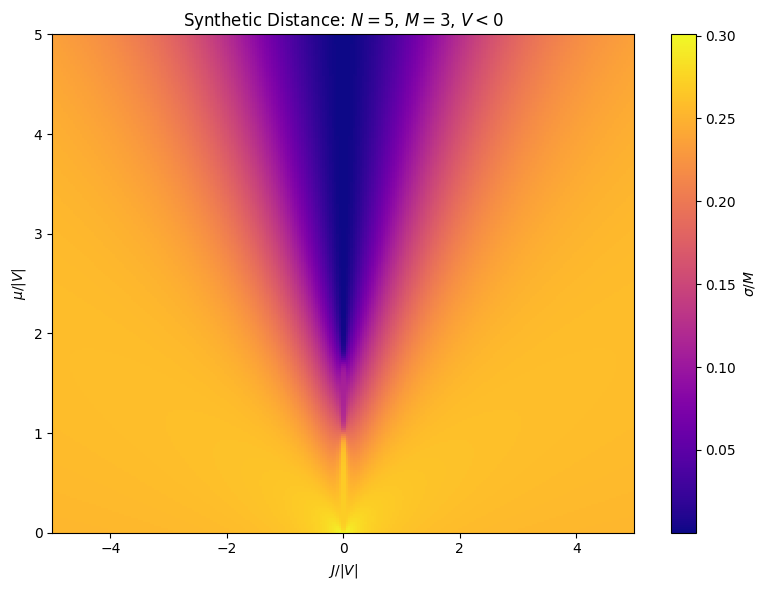

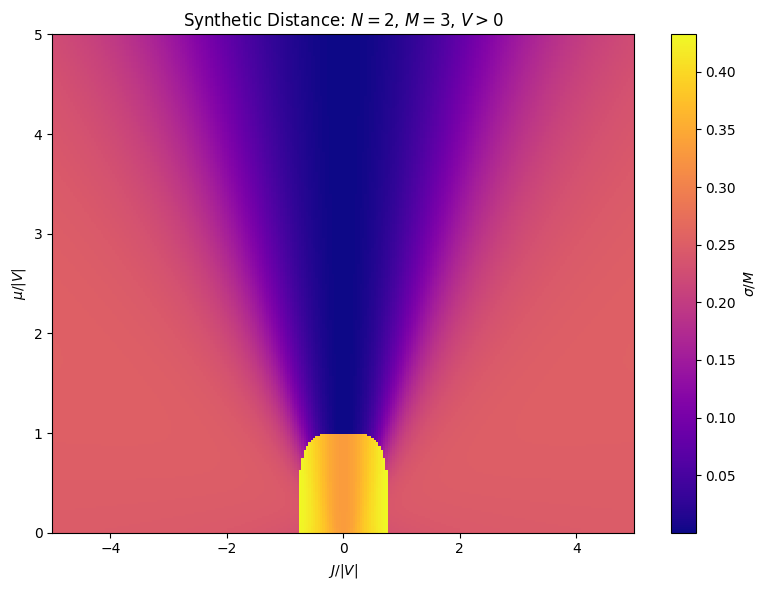

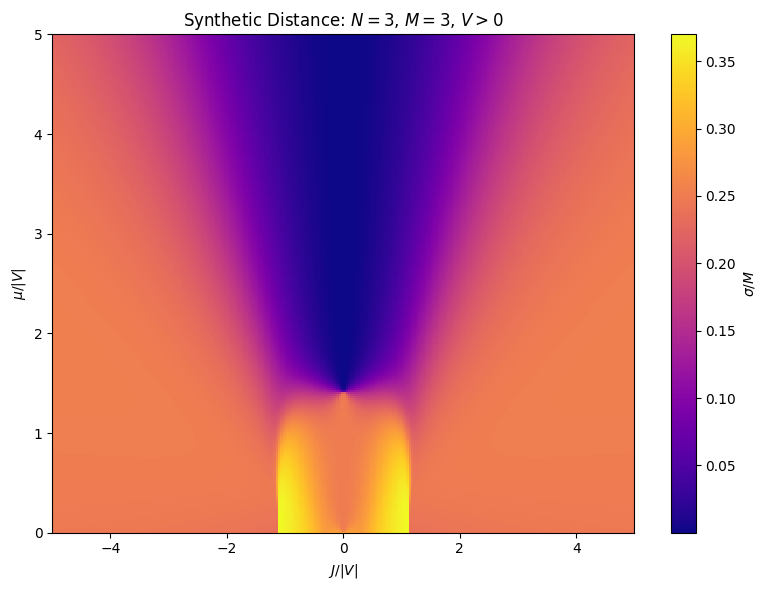

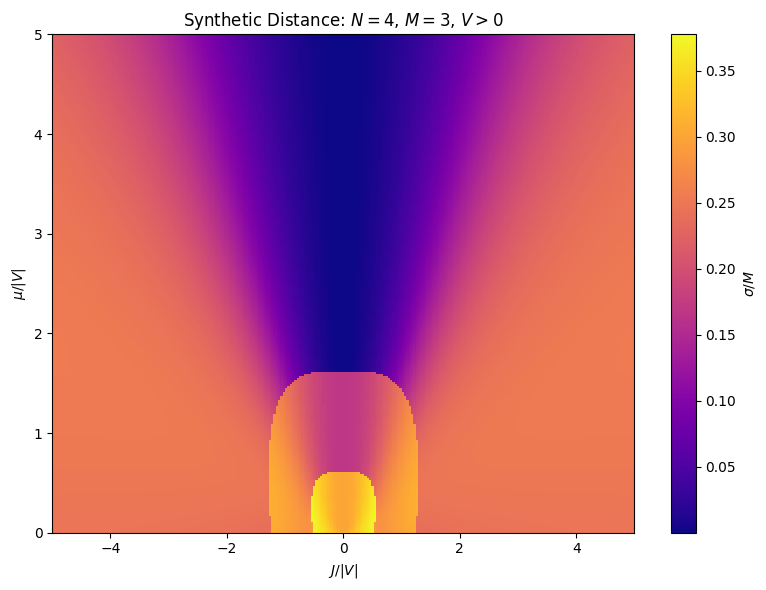

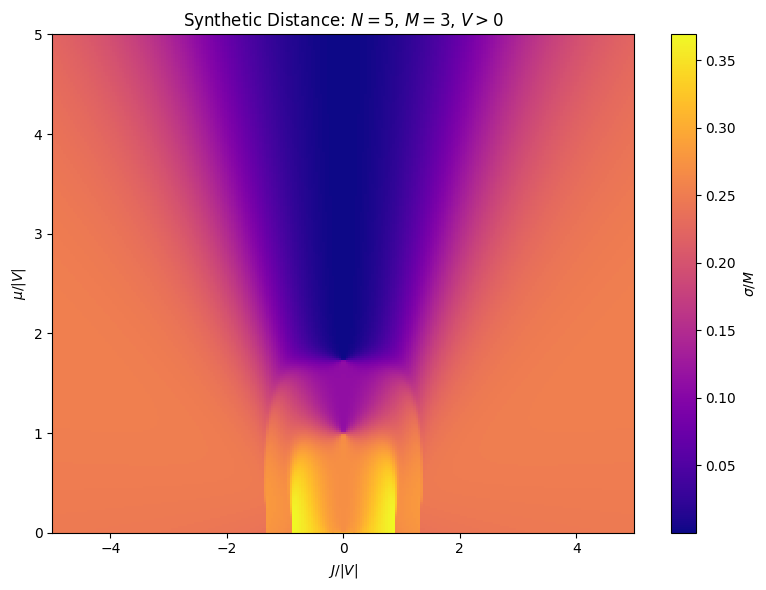

In [10]:
# M = 3, varying N
M = 3

for V in [-1,1]:
    for N in [2,3,4,5
            ]:
        if np.sign(V) > 0:
            plot_data(N, M, sign_V="positive", gap_or_sigma="sigma")
        else:
            plot_data(N, M, sign_V="negative", gap_or_sigma="sigma")